In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [16]:
# Task 1
X, y = load_diabetes(return_X_y=True)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
#Task 2 – Step 1: Baseline Linear Regression

# Baseline model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Coefficients
print("Coefficients:", lin_reg.coef_)


Baseline Linear Regression
Train MSE: 2868.549702835577
Test MSE: 2900.193628493482
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [18]:
#Step 2: Hyperparameter Tuning (Ridge & Lasso)

alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, alphas, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)


Best Ridge alpha: {'alpha': 0.1}
Best Lasso alpha: {'alpha': 0.1}


In [19]:
#Step 3: Regularization Experiments (L1 vs L2)

# Best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

# Predictions
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

# MSE comparison
print("\nRidge Regression")
print("Train MSE:", mean_squared_error(y_train, ridge_train_pred))
print("Test MSE:", mean_squared_error(y_test, ridge_test_pred))

print("\nLasso Regression")
print("Train MSE:", mean_squared_error(y_train, lasso_train_pred))
print("Test MSE:", mean_squared_error(y_test, lasso_test_pred))

# Coefficients comparison
print("\nRidge Coefficients:", best_ridge.coef_)
print("Lasso Coefficients:", best_lasso.coef_)


Ridge Regression
Train MSE: 2912.983541587901
Test MSE: 2856.4868876706537

Lasso Regression
Train MSE: 2935.25823259759
Test MSE: 2798.193485169719

Ridge Coefficients: [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
Lasso Coefficients: [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]


In [20]:
# Part 2: Classification Task (Breast Cancer)

X, y = load_breast_cancer(return_X_y=True)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Step 1: Baseline model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy
print("Baseline Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Coefficients
print("Coefficients:")
print(log_reg.coef_)

Baseline Logistic Regression
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
Coefficients:
[[-0.43190368 -0.38732553 -0.39343248 -0.46521006 -0.07166728  0.54016395
  -0.8014581  -1.11980408  0.23611852  0.07592093 -1.26817815  0.18887738
  -0.61058302 -0.9071857  -0.31330675  0.68249145  0.17527452 -0.3112999
   0.50042502  0.61622993 -0.87984024 -1.35060559 -0.58945273 -0.84184594
  -0.54416967  0.01611019 -0.94305313 -0.77821726 -1.20820031 -0.15741387]]


In [22]:
#Step 2: Hyperparameter Tuning (L1 & L2)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_cv = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

log_cv.fit(X_train, y_train)

print("Best Parameters:", log_cv.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [23]:
#Step 3: L1 vs L2 Regularization

# Best model from GridSearch
best_log = log_cv.best_estimator_

# Predictions
y_train_pred = best_log.predict(X_train)
y_test_pred = best_log.predict(X_test)

print("Optimized Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Coefficients
print("Optimized Coefficients:")
print(best_log.coef_)

Optimized Logistic Regression
Train Accuracy: 0.9824175824175824
Test Accuracy: 0.9912280701754386
Optimized Coefficients:
[[-0.35740273 -0.39859835 -0.34749774 -0.37455018 -0.12521695  0.02475375
  -0.3785622  -0.47932905 -0.02811483  0.16035147 -0.49455207  0.02990724
  -0.35254843 -0.39492085 -0.08473517  0.26807348  0.07327813 -0.07086033
   0.14636137  0.24562247 -0.4976507  -0.58009538 -0.44256477 -0.47928017
  -0.38160644 -0.14069316 -0.39954273 -0.4478887  -0.4689656  -0.11858824]]


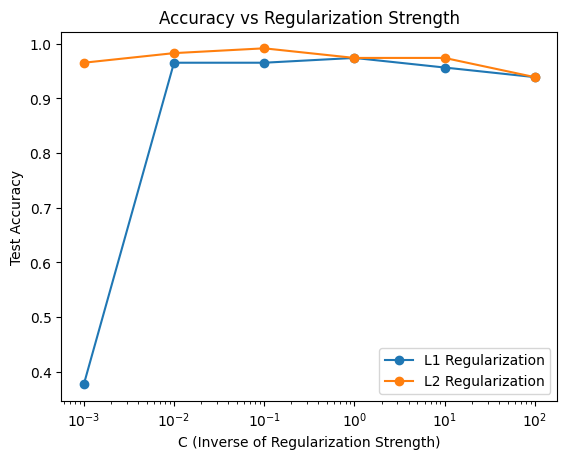

In [24]:
import matplotlib.pyplot as plt

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

l1_acc = []
l2_acc = []

for C in C_values:
    # L1 model
    l1_model = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=1000
    )
    l1_model.fit(X_train, y_train)
    l1_acc.append(accuracy_score(y_test, l1_model.predict(X_test)))

    # L2 model
    l2_model = LogisticRegression(
        penalty='l2',
        C=C,
        solver='liblinear',
        max_iter=1000
    )
    l2_model.fit(X_train, y_train)
    l2_acc.append(accuracy_score(y_test, l2_model.predict(X_test)))

# Plot
plt.plot(C_values, l1_acc, marker='o', label='L1 Regularization')
plt.plot(C_values, l2_acc, marker='o', label='L2 Regularization')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Regularization Strength')
plt.legend()
plt.show()


In [25]:
print("""
==============================
Effect of Regularization on the Bias–Variance Tradeoff
==============================

PART 1: REGRESSION (Diabetes Dataset)

In linear regression, models without regularization can learn very large
coefficients, making them highly sensitive to noise in the training data.
This leads to overfitting and poor generalization.

L1 Regularization (Lasso Regression):
- Adds the absolute value of coefficients as a penalty term.
- Forces some coefficients to become exactly zero.
- Performs feature selection and simplifies the model.
- Reduces variance and helps prevent overfitting.

L2 Regularization (Ridge Regression):
- Adds the squared value of coefficients as a penalty term.
- Shrinks coefficients smoothly toward zero.
- Keeps all features but reduces their influence.
- Improves model stability and generalization.

Effect of Overly Strong Regularization in Regression:
- Coefficients become too small.
- Important features may be ignored.
- Model becomes too simple (underfitting).
- Bias increases and prediction error increases.


PART 2: CLASSIFICATION (Breast Cancer Dataset)

In logistic regression, regularization controls the complexity of the model
by penalizing large coefficient values, helping to avoid overfitting.

L1 Regularization (L1 Logistic Regression):
- Encourages sparse coefficients.
- Sets some coefficients exactly to zero.
- Performs automatic feature selection.
- Reduces variance and mitigates overfitting.

L2 Regularization (L2 Logistic Regression):
- Shrinks all coefficients smoothly.
- Rarely sets coefficients exactly to zero.
- Works well when features are correlated.
- Produces more stable and generalizable models.

Effect of Overly Strong Regularization in Classification:
- Important features are suppressed.
- Model becomes too simple.
- Bias increases.
- Training and test accuracy decrease.

Conclusion:
Regularization balances the bias–variance tradeoff by reducing variance
and preventing overfitting. However, excessive regularization increases
bias and leads to underfitting. Proper tuning of regularization strength
is essential for optimal model performance.
""")



Effect of Regularization on the Bias–Variance Tradeoff

PART 1: REGRESSION (Diabetes Dataset)

In linear regression, models without regularization can learn very large
coefficients, making them highly sensitive to noise in the training data.
This leads to overfitting and poor generalization.

L1 Regularization (Lasso Regression):
- Adds the absolute value of coefficients as a penalty term.
- Forces some coefficients to become exactly zero.
- Performs feature selection and simplifies the model.
- Reduces variance and helps prevent overfitting.

L2 Regularization (Ridge Regression):
- Adds the squared value of coefficients as a penalty term.
- Shrinks coefficients smoothly toward zero.
- Keeps all features but reduces their influence.
- Improves model stability and generalization.

Effect of Overly Strong Regularization in Regression:
- Coefficients become too small.
- Important features may be ignored.
- Model becomes too simple (underfitting).
- Bias increases and prediction error inc